# Available Time Functions

In [7]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from maxwellbloch import t_funcs

sns.set_style('darkgrid')

In [8]:
tlist = np.linspace(0., 1., 201)

## Square

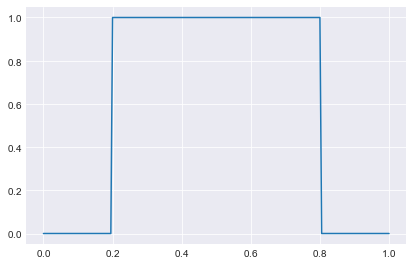

In [10]:
plt.plot(tlist, t_funcs.square(1)(tlist,  args={ 'ampl_1': 1.0, 'on_1': 0.2, 'off_1': 0.8}))

## Gaussian

The Gaussian profile is defined as

$$
\Omega_0 \exp \left[ -4 \log 2 \left( \frac{t - t_0}{t_w}
\right)^2 \right]
$$

where $t_0$ (`centre_1`) is the point at which the function reaches its peak amplitude
$\Omega_0$ (`ampl_1`). The width $t_w$ (`fwhm_1`) is
the full width at half maximum (FWHM) of a Gaussian.

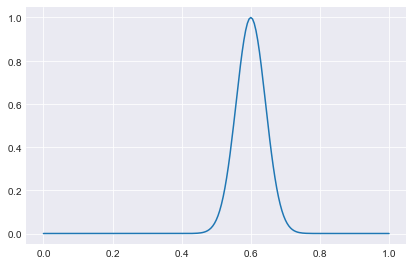

In [11]:
plt.plot(tlist, t_funcs.gaussian(1)(tlist, args={ 'ampl_1': 1.0, 'fwhm_1': 0.1, 'centre_1': 0.6}))

## Ramp On

The ramp on and off functions use a Gaussian profile to reach peak amplitude. For example, the `ramp_on` function is

$$
\Omega(t) = 
\begin{cases}
\Omega_0 \exp \left[ -4 \log 2 \left( \frac{t - t_0}{t_w}
\right)^2 \right] & t < t_0\\
\Omega_0 & t \ge t_0
\end{cases}
$$
    
where $t_0$ (`centre_1`) is the point at which the function reaches its peak amplitude
$\Omega_0$ (`ampl_1`). The duration of the ramp-on is governed by $t_w$ (`fwhm_1`), which is
the full width at half maximum (FWHM) of a Gaussian. The `ramp_off` and `ramp_onoff` functions behave in the same way.

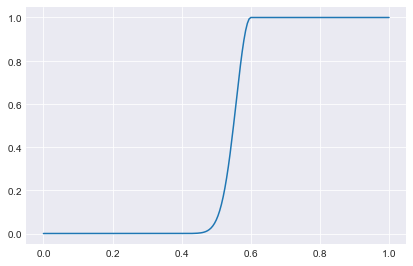

In [12]:
plt.plot(tlist, t_funcs.ramp_on(1)(tlist, args={ 'ampl_1': 1.0, 'fwhm_1': 0.1, 'on_1': 0.6}))

## Ramp Off

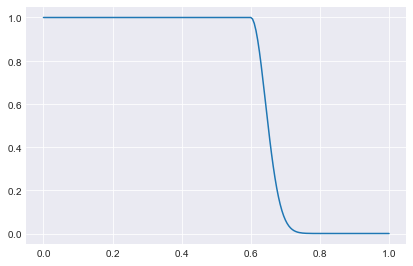

In [13]:
plt.plot(tlist, t_funcs.ramp_off(1)(tlist,  args={ 'ampl_1': 1.0, 'fwhm_1': 0.1, 'off_1': 0.6}))

## Ramp On and Off

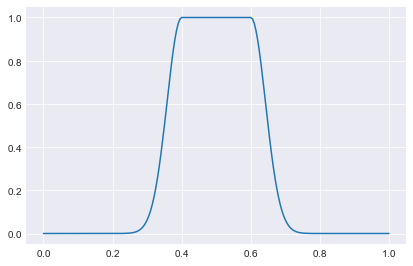

In [14]:
plt.plot(tlist, t_funcs.ramp_onoff(1)(tlist,  args={ 'ampl_1': 1.0, 'fwhm_1': 0.1, 'on_1': 0.4, 'off_1':0.6}))

## Sech

The hyperbolic secant (sech) function is defined by

$$
\Omega_0 \textrm{sech}\left(\frac{t - t_0}{t_w}\right)
$$

where $t_0$ (`centre_1`) is the point at which the function reaches its peak amplitude
$\Omega_0$ (`ampl_1`). The width is governed by $t_w$ (`width_1`).

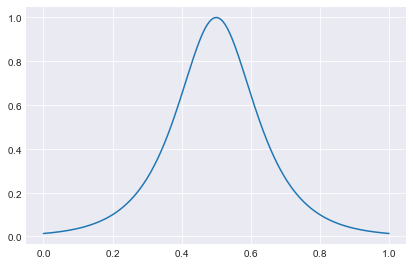

In [15]:
plt.plot(tlist, t_funcs.sech(1)(tlist,  args={ 'ampl_1': 1.0, 'width_1': 0.1, 'centre_1': 0.5}))

## Sinc

The cardinal sine (sinc) function is defined by

$$
\Omega_0 \textrm{sinc} \left( \frac{w t}{\sqrt{\pi/2}} \right)
$$

where $w$ is a width function and $\Omega_0$ (`ampl_1`) is the peak amplitude of the function.

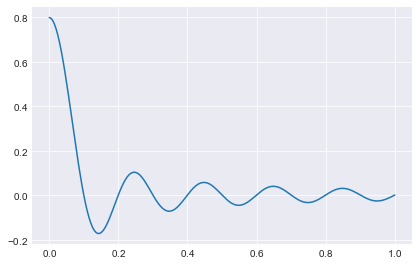

In [16]:
plt.plot(tlist, t_funcs.sinc(1)(tlist,  args={ 'ampl_1': 1.0, 'width_1': 10.}))

## Combining Time Functions



In [18]:
f = lambda t, args: t_funcs.gaussian(1)(t,args) + t_funcs.ramp_onoff(2)(t, args)

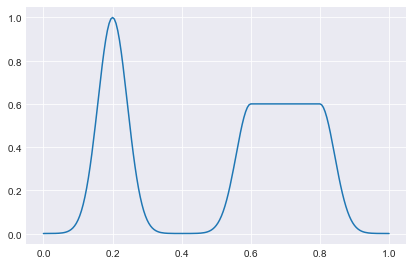

In [19]:
plt.plot(tlist, f(tlist, args={'ampl_1': 1.0, 'fwhm_1': 0.1, 'centre_1': 0.2,
                               'ampl_2': 0.6, 'fwhm_2': 0.1, 'on_2':0.6, 'off_2':0.8}))

In [20]:
g = lambda t, args: (t_funcs.gaussian(1)(t,args) + t_funcs.gaussian(2)(t, args) + t_funcs.gaussian(3)(t, args) + 
                     t_funcs.gaussian(4)(t, args))

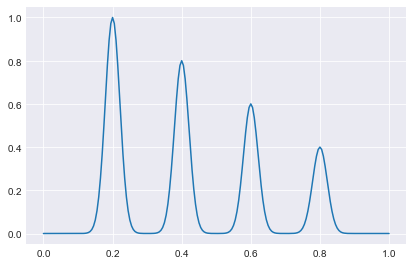

In [21]:
plt.plot(tlist, g(tlist, args={'ampl_1': 1.0, 'fwhm_1': 0.05, 'centre_1': 0.2,
                               'ampl_2': 0.8, 'fwhm_2': 0.05, 'centre_2': 0.4,
                               'ampl_3': 0.6, 'fwhm_3': 0.05, 'centre_3': 0.6,
                               'ampl_4': 0.4, 'fwhm_4': 0.05, 'centre_4': 0.8,}))

## Summary

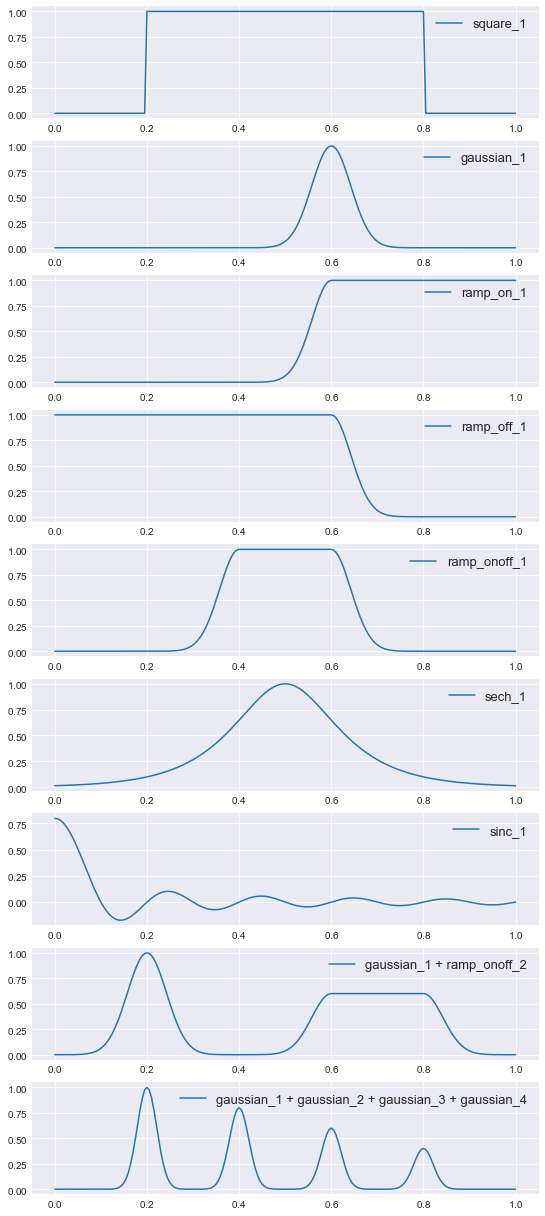

In [22]:
fig = plt.figure(figsize=(8, 20))
fig.add_subplot(9,1,1)
plt.plot(tlist, t_funcs.square(1)(tlist,  
                                  args={ 'ampl_1': 1.0, 'on_1': 0.2, 'off_1': 0.8}), 
         label="square_1")
fig.add_subplot(9,1,2)
plt.plot(tlist, t_funcs.gaussian(1)(tlist, 
                                    args={ 'ampl_1': 1.0, 'fwhm_1': 0.1, 'centre_1': 0.6}),
         label="gaussian_1")
fig.add_subplot(9,1,3)
plt.plot(tlist, t_funcs.ramp_on(1)(tlist, 
                                   args={ 'ampl_1': 1.0, 'fwhm_1': 0.1, 'on_1': 0.6}),
         label="ramp_on_1")
fig.add_subplot(9,1,4)
plt.plot(tlist, t_funcs.ramp_off(1)(tlist,
                                    args={ 'ampl_1': 1.0, 'fwhm_1': 0.1, 'off_1': 0.6}),
         label="ramp_off_1")
fig.add_subplot(9,1,5)
plt.plot(tlist, t_funcs.ramp_onoff(1)(tlist,  
                                      args={'ampl_1': 1.0, 'fwhm_1': 0.1, 'on_1': 0.4, 
                                            'off_1':0.6}),
         label="ramp_onoff_1")
fig.add_subplot(9,1,6)
plt.plot(tlist, t_funcs.sech(1)(tlist,  
                                args={ 'ampl_1': 1.0, 'width_1': 0.1, 'centre_1': 0.5}),
         label="sech_1")
fig.add_subplot(9,1,7)
plt.plot(tlist, t_funcs.sinc(1)(tlist, 
                                args={ 'ampl_1': 1.0, 'width_1': 10.}),
         label="sinc_1")
fig.add_subplot(9,1,8)
plt.plot(tlist, f(tlist, args={'ampl_1': 1.0, 'fwhm_1': 0.1, 'centre_1': 0.2,
                               'ampl_2': 0.6, 'fwhm_2': 0.1, 'on_2':0.6, 'off_2':0.8}),
         label="gaussian_1 + ramp_onoff_2")
fig.add_subplot(9,1,9)
plt.plot(tlist, g(tlist, args={'ampl_1': 1.0, 'fwhm_1': 0.05, 'centre_1': 0.2,
                               'ampl_2': 0.8, 'fwhm_2': 0.05, 'centre_2': 0.4,
                               'ampl_3': 0.6, 'fwhm_3': 0.05, 'centre_3': 0.6,
                               'ampl_4': 0.4, 'fwhm_4': 0.05, 'centre_4': 0.8,}),
         label="gaussian_1 + gaussian_2 + gaussian_3 + gaussian_4")

for ax in fig.axes:
    ax.legend()

plt.savefig('images/{0}.png'.format("A-available-time-functions"))